In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 15)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

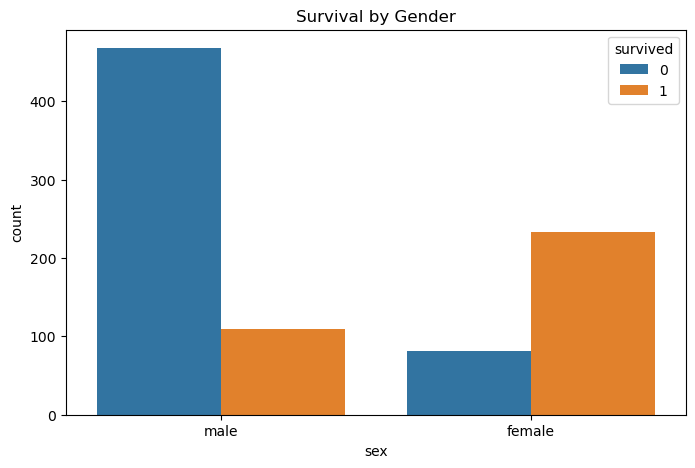

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.show()

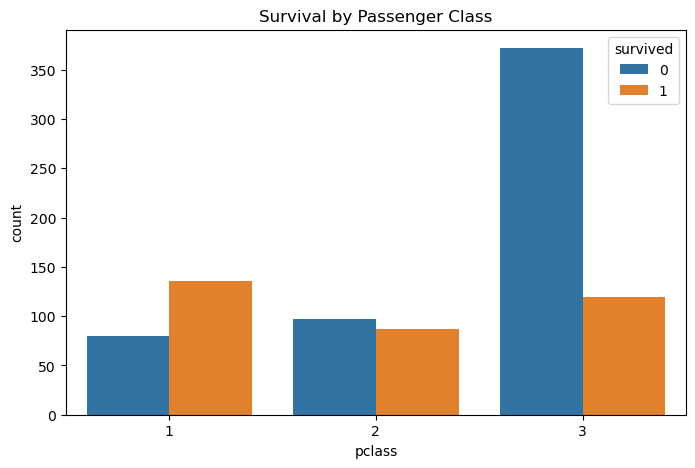

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

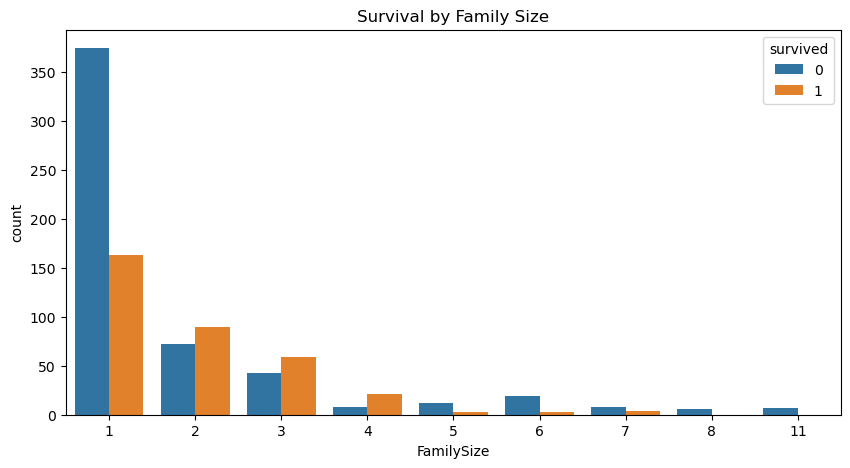

In [10]:
# Create FamilySize from SibSp + Parch
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='FamilySize', hue='survived')
plt.title("Survival by Family Size")
plt.show()


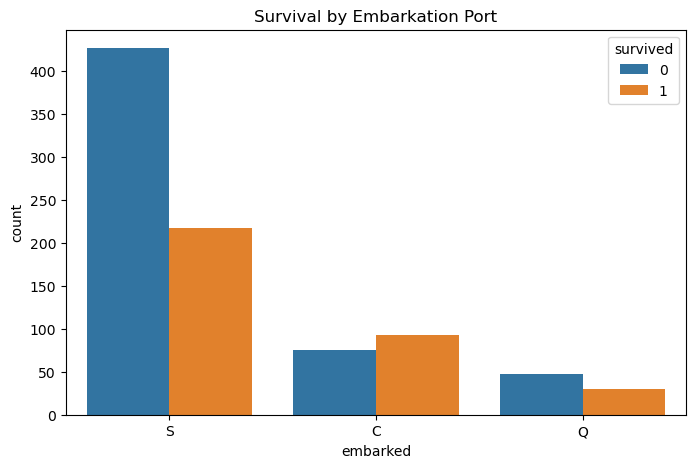

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title("Survival by Embarkation Port")
plt.show()


In [12]:
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))


In [13]:
df['age'].isnull().sum()

0

In [14]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['deck'].fillna(df['deck'].mode()[0], inplace=True)


In [15]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
FamilySize     0
dtype: int64

In [18]:
corr_df = df.copy()
corr_df['sex'] = corr_df['sex'].map({'male': 0, 'female': 1})
corr_df['embarked'] = corr_df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
corr_df['pclass'] = corr_df['pclass'].astype(int)

corr_df.dtypes

# Drop categorical duplicates or irrelevant columns
corr_df.drop(['class', 'deck'], axis=1, inplace=True)
corr_df = corr_df.copy()

# Encode object columns
corr_df['who'] = corr_df['who'].map({'man': 0, 'woman': 1, 'child': 2})
corr_df['embark_town'] = corr_df['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
corr_df['alive'] = corr_df['alive'].map({'no': 0, 'yes': 1})

# Convert boolean to int
corr_df['adult_male'] = corr_df['adult_male'].astype(int)
corr_df['alone'] = corr_df['alone'].astype(int)

# ✅ Check all are now numeric
print(corr_df.dtypes)


survived         int64
pclass           int32
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked       float64
who              int64
adult_male       int32
embark_town      int64
alive            int64
alone            int32
FamilySize       int64
dtype: object


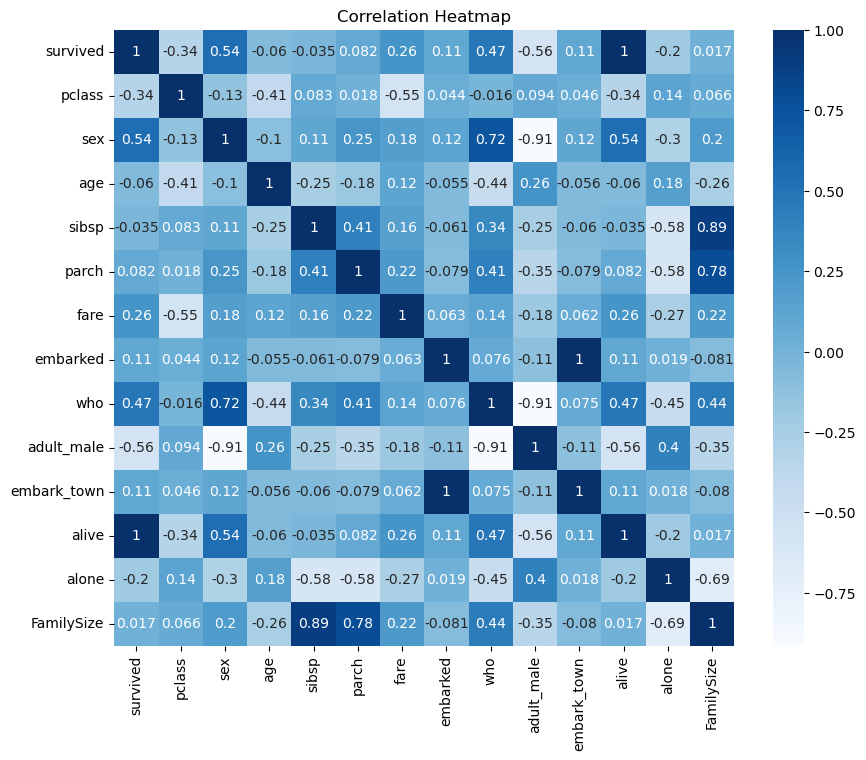

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [186]:
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)


In [190]:
df['adult_male'].fillna(1, inplace=True)  # You can change to 0 depending on logic
df['alone'].fillna(0, inplace=True)


In [192]:
mode_val = df['who'].mode()
if not mode_val.empty:
    df['who'].fillna(mode_val[0], inplace=True)
else:
    print("⚠️ 'who' column has no mode (possibly all NaN). Fill it manually.")
    df['who'].fillna('man', inplace=True)  # or another sensible default


⚠️ 'who' column has no mode (possibly all NaN). Fill it manually.


In [194]:
for col in ['embarked', 'embark_town', 'alive']:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col].fillna(mode_val[0], inplace=True)
    else:
        print(f"⚠️ Column '{col}' has no mode. You need to fill it manually.")


⚠️ Column 'embarked' has no mode. You need to fill it manually.
⚠️ Column 'embark_town' has no mode. You need to fill it manually.
⚠️ Column 'alive' has no mode. You need to fill it manually.


In [196]:
df['embarked'].fillna('S', inplace=True)
df['embark_town'].fillna('Southampton', inplace=True)
df['alive'] = df['survived'].map({0: 'no', 1: 'yes'})


In [198]:
df.isnull().sum()

survived         0
pclass           0
sex            891
age              0
sibsp            0
parch            0
fare             0
embarked         0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
FamilySize       0
dtype: int64

In [204]:
df['sex'].fillna('male', inplace=True)


In [206]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
FamilySize     0
dtype: int64

In [208]:
# Recreate 'alive' from survived column
df['alive'] = df['survived'].map({0: 'no', 1: 'yes'})

# Fill any remaining NaNs in numeric flag columns
df['adult_male'] = df['adult_male'].fillna(1).astype(int)
df['alone'] = df['alone'].fillna(0).astype(int)

# Now encode all categorical columns
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['who'] = df['who'].map({'man': 0, 'woman': 1, 'child': 2})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['embark_town'] = df['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
df['alive'] = df['alive'].map({'no': 0, 'yes': 1})

In [210]:
df.drop(['deck', 'class'], axis=1, inplace=True, errors='ignore')


In [242]:
features = [
    'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
    'embarked', 'who', 'adult_male', 'embark_town',
    'alone', 'FamilySize'
]


In [244]:
x = df[features]
y = df['survived']


In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [248]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [250]:
lr.fit(x_train,y_train)

LogisticRegression()

In [252]:
y_pred1=lr.predict(x_test)

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [256]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [258]:
y_pred2=rf.predict(x_test)

In [260]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))


Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[91 14]
 [21 53]]


In [262]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))


Random Forest Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


Confusion Matrix:
 [[90 15]
 [18 56]]


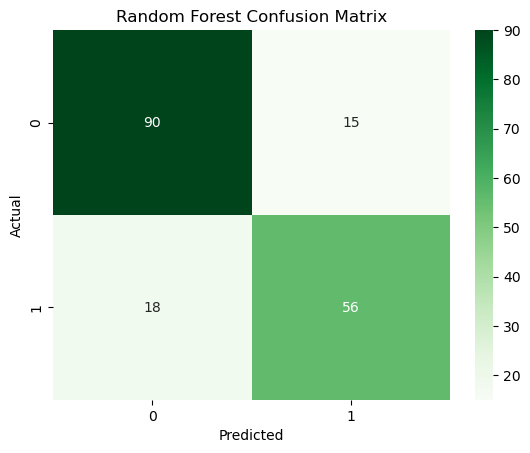

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [266]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2))


Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8156424581005587


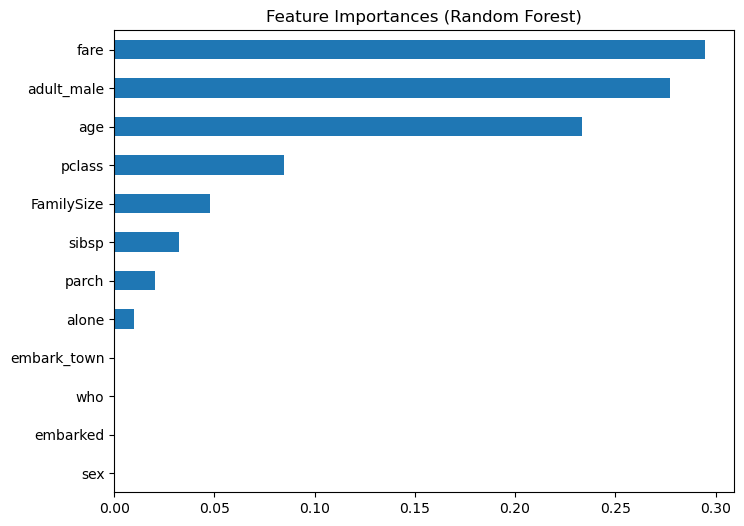

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances (Random Forest)")
plt.show()
